## Exploring Biomarkers for Paper 1
    
 * __Time Dysnchrony__: over how many time frames does the peak regional reservoir strain spread?
 * __Normalised Regional Reservoir Strain wrt Global average__:
     * Each regional reservoir strain is given as percentage wrt global average 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
## COHORT

ebr=['EBR/case01', 'EBR/case02']

## Ronak update on demographics
af_cases = ['10', '18', '19', '20', '23', '26', '27', '31', '25', '34']
af_cases = [f'CT-CRT/case{case}' for case in af_cases]
af_cases = af_cases + ebr

## Ronak update on demograhpics
nonaf_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '24', '28', '29', '30', '32']
nonaf_cases = [f"CT-CRT/case{case}" for case in nonaf_cases]

## f20 cases
f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT/case{case_ind}' for case_ind in f20_cases]
f20_cases = f20_cases + ebr

regions = ["Global", "Post", "Septum", "Lat", "Ant", "Inf"]
regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

regions_v2 = ['global', 'post', 'sept', 'lat', 'ant', 'inf']

# Time Desynchrony

In [3]:
## Load area strains for nonAF cases

dataPath = "/home/csi20local/Data/RG_CT_Cases"
# dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

## N_strain_type, N_cases, N_regions, N_time_frames
## The below contains strain transients over 10 frames for area, fibre and cross-fibre strains (1st index)
## Each of cases (2nd ind)
## Each region (3rd ind)
## Each time frame (4th ind)
nonaf_strains = np.zeros((3, len(nonaf_cases), 6, 10))

for j in range(0, len(nonaf_cases)):
    case = nonaf_cases[j]
    
    if case in f20_cases:
        filepath = f'{dataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath = f'{dataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    for i in range(0, len(regions)):
        region = regions[i]

#         crt01_data[i, :] = np.loadtxt(f"{dataPath}/{nonaf_cases[0]}/MT-HiRes/SW-0.0-BE-1e-9/area_meanstrains_{region}.txt")
        nonaf_strains[0, j, i, :] = np.loadtxt(f"{filepath}/area_meanstrains_{region}.txt")
        nonaf_strains[1, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[0]
        nonaf_strains[2, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[1]
        

In [5]:
## Load area strains for AF cases

dataPath = "/home/csi20local/Data/RG_CT_Cases"
# dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

## N_strain_type, N_cases, N_regions, N_time_frames
## The below contains strain transients over 10 frames for area, fibre and cross-fibre strains (1st index)
## Each of cases (2nd ind)
## Each region (3rd ind)
## Each time frame (4th ind)
af_strains = np.zeros((3, len(af_cases), 6, 10))

for j in range(0, len(af_cases)):
    case = af_cases[j]
    
    if case in f20_cases:
        filepath = f'{dataPath}/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9'
    
    else:
        filepath = f'{dataPath}/{case}/MT-HiRes/SW-0.0-BE-1e-9'
    
    for i in range(0, len(regions)):
        region = regions[i]
        
        af_strains[0, j, i, :] = np.loadtxt(f"{filepath}/area_meanstrains_{region}.txt")
        af_strains[1, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[0]
        af_strains[2, j, i, :] = np.loadtxt(f"{filepath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt")[1]
        

In [6]:
## the below gives delta T
t_dys_nonaf = nonaf_strains[:, :, 1:, :].argmax(axis=3).ptp(axis=2)
t_dys_nonaf

array([[1, 2, 1, 0, 1, 1, 1, 2, 5, 1, 1, 4, 0, 2, 4, 1, 1],
       [6, 3, 0, 1, 3, 2, 1, 2, 7, 2, 1, 3, 2, 2, 3, 1, 1],
       [2, 2, 2, 1, 2, 1, 1, 5, 6, 1, 1, 4, 0, 2, 4, 1, 1]])

In [7]:
## the below gives delta T
t_dys_af = af_strains[:, :, 1:, :].argmax(axis=3).ptp(axis=2)
t_dys_af

array([[4, 5, 4, 2, 6, 5, 3, 5, 1, 1, 4, 1],
       [3, 4, 4, 3, 4, 5, 2, 6, 3, 4, 2, 2],
       [1, 2, 1, 3, 4, 5, 3, 5, 2, 2, 7, 2]])

In [8]:
## Testing for statistical significance for each of three strain metrics DELTA T

result_area = stats.ttest_ind(t_dys_af[0, :], t_dys_nonaf[0, :])
result_f1 = stats.ttest_ind(t_dys_af[1, :], t_dys_nonaf[1, :])
result_f2 = stats.ttest_ind(t_dys_af[2, :], t_dys_nonaf[2, :])

print("Area strain: ", result_area)
print("f1 strain: ", result_f1)
print("f2 strain: ", result_f2)

Area strain:  Ttest_indResult(statistic=2.9839391124753476, pvalue=0.005976229509215665)
f1 strain:  Ttest_indResult(statistic=1.904713544010615, pvalue=0.06752184770110745)
f2 strain:  Ttest_indResult(statistic=1.4816560089686863, pvalue=0.1500094224966149)


In [9]:
print("non-AF mean: ", t_dys_nonaf[2, :].mean())
print("non-AF std: ", t_dys_nonaf[2, :].std())

non-AF mean:  2.1176470588235294
non-AF std:  1.6044919643512772


In [10]:
print("AF mean: ", t_dys_af[2, :].mean())
print("AF std: ", t_dys_af[2, :].std())

AF mean:  3.0833333333333335
AF std:  1.7539637649874324


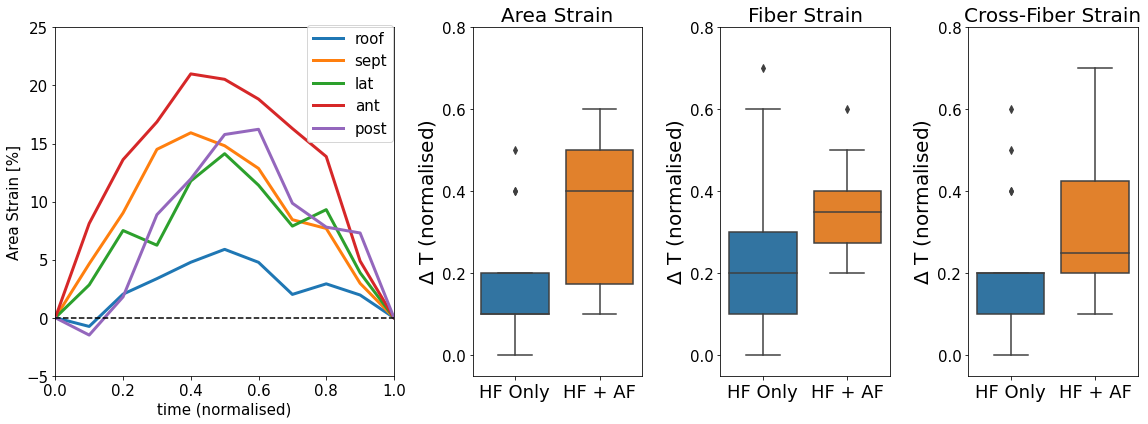

In [11]:
# ## Plot showing:
# a) Sample strain transient
# b) Copmarisons of DELTA T for all strain metrics

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,6), gridspec_kw={'width_ratios': [2, 1, 1, 1]})

case_ind = 1
for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions[i+1])
    
ax1.tick_params(axis='both', labelsize=15)
ax1.set_ylim(-5, 25)
ax1.set_xlim(0, 1)
ax1.legend(fontsize=15, bbox_to_anchor=(0.72, .65))
ax1.set_xlabel("time (normalised)", fontsize=15)
ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax1.plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')


sns.boxplot(data=[t_dys_nonaf[0,:]/10., t_dys_af[0,:]/10.], ax=ax2)
sns.boxplot(data=[t_dys_nonaf[1,:]/10., t_dys_af[1,:]/10.], ax=ax3)
sns.boxplot(data=[t_dys_nonaf[2,:]/10., t_dys_af[2,:]/10.], ax=ax4)


ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(0, 0.9, 0.1))
ax2.set_ylim(-0.05, 0.8)
ax3.set_ylim(-0.05, 0.8)
ax4.set_ylim(-0.05, 0.8)


ax2.set_title("Area Strain", fontsize=20)
ax3.set_title("Fiber Strain", fontsize=20)
ax4.set_title("Cross-Fiber Strain", fontsize=20)

for i in range(1, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticklabels(["HF Only", "HF + AF"], fontsize=18)
    fig.axes[i].set_ylabel("$\Delta$ T (normalised)", fontsize=20)

plt.tight_layout()

ax2.set_yticks(np.arange(0.0, 1.0, 0.2))
ax3.set_yticks(np.arange(0.0, 1.0, 0.2))
ax4.set_yticks(np.arange(0.0, 1.0, 0.2))

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/t_dysnch_SAN.png", dpi=200, bbox_inches="tight")

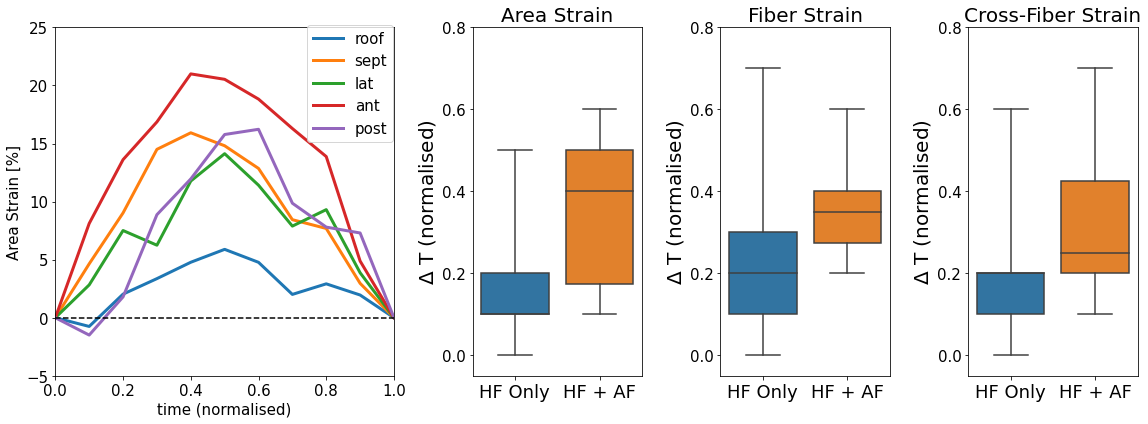

In [12]:
# ## Plot showing:
# a) Sample strain transient
# b) Copmarisons of DELTA T for all strain metrics

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,6), gridspec_kw={'width_ratios': [2, 1, 1, 1]})

case_ind = 1
for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions[i+1])
    
ax1.tick_params(axis='both', labelsize=15)
ax1.set_ylim(-5, 25)
ax1.set_xlim(0, 1)
ax1.legend(fontsize=15, bbox_to_anchor=(0.72, .65))
ax1.set_xlabel("time (normalised)", fontsize=15)
ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax1.plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')


sns.boxplot(data=[t_dys_nonaf[0,:]/10., t_dys_af[0,:]/10.], ax=ax2, whis=(0, 100))
sns.boxplot(data=[t_dys_nonaf[1,:]/10., t_dys_af[1,:]/10.], ax=ax3, whis=(0, 100))
sns.boxplot(data=[t_dys_nonaf[2,:]/10., t_dys_af[2,:]/10.], ax=ax4, whis=(0, 100))


ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(0, 0.9, 0.1))
ax2.set_ylim(-0.05, 0.8)
ax3.set_ylim(-0.05, 0.8)
ax4.set_ylim(-0.05, 0.8)


ax2.set_title("Area Strain", fontsize=20)
ax3.set_title("Fiber Strain", fontsize=20)
ax4.set_title("Cross-Fiber Strain", fontsize=20)

for i in range(1, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticklabels(["HF Only", "HF + AF"], fontsize=18)
    fig.axes[i].set_ylabel("$\Delta$ T (normalised)", fontsize=20)

plt.tight_layout()

ax2.set_yticks(np.arange(0.0, 1.0, 0.2))
ax3.set_yticks(np.arange(0.0, 1.0, 0.2))
ax4.set_yticks(np.arange(0.0, 1.0, 0.2))

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/t_dysnch_SAN_fullwhis.png", dpi=200, bbox_inches="tight")

In [13]:
np.round(stats.ttest_ind(t_dys_nonaf[2,:], t_dys_af[2,:]), 3)

array([-1.482,  0.15 ])

In [14]:
nonaf_strains.shape

(3, 17, 6, 10)

In [15]:
nonaf_strains[0, 0, :, :]

array([[ 0.        ,  0.98655507,  3.05794097,  6.03158241,  6.78876102,
         3.6268818 , -0.86561467, -2.18666584, -1.0228328 , -3.45256637],
       [ 0.        , -0.91369206,  0.33787242,  0.65918924,  2.13520551,
         0.59468013, -0.59427354,  0.43387035,  0.839249  , -1.54719688],
       [ 0.        ,  1.15866259,  4.43181469,  5.25559177,  4.99941271,
         1.35817873, -1.8597108 , -6.86953444, -1.04252023,  1.61549569],
       [ 0.        ,  4.64601996,  8.8281026 , 12.98685297, 11.77992495,
        11.86406236,  0.81985798, -5.1283428 , -0.60224393,  0.13098532],
       [ 0.        ,  0.2037782 ,  2.58917269,  4.51569814,  5.3053702 ,
         0.85273775, -4.39730386,  0.4301672 ,  0.68884233, -9.89053137],
       [ 0.        ,  0.64149612,  0.89269576,  7.27073922,  9.30826821,
         4.16965579,  2.45405452, -3.47982395, -4.98648769, -1.66304487]])

## Which regions peak latest?

In [17]:
## region_max_strain_time shows:
## Each row: a new case
## Each col: region
## Values: time frame for which each region has maximal strain (i.e. when reservoir strain peaks)

region_max_strain_time = np.argmax(nonaf_strains[0, :, :, :], axis=2)

max_strain_time_percase = region_max_strain_time.max(axis=1)

for i in range(0, len(nonaf_cases)):
    case=nonaf_cases[i]
    
    condition = region_max_strain_time[i, :] == max_strain_time_percase[i]
    latest_regions_v2 = [regions_v2[i] for i, val in enumerate(condition) if val]
    
    ## Remove global if is one of the latest peak strians
    if "global" in latest_regions_v2:
        latest_regions_v2.remove("global")
    
    ## Only print out cases which have a single region as latest peak
    if len(latest_regions_v2) == 1:
        print(case, latest_regions_v2)

CT-CRT/case02 ['inf']
CT-CRT/case08 ['inf']
CT-CRT/case14 ['inf']
CT-CRT/case15 ['lat']
CT-CRT/case17 ['lat']
CT-CRT/case29 ['sept']


In [18]:
## AF cases

region_max_strain_time = np.argmax(af_strains[0, :, :, :], axis=2)

max_strain_time_percase = region_max_strain_time.max(axis=1)

for i in range(0, len(af_cases)):
    case=af_cases[i]
    
    condition = region_max_strain_time[i, :] == max_strain_time_percase[i]
    latest_regions_v2 = [regions_v2[i] for i, val in enumerate(condition) if val]
    
    ## Remove global if is one of the latest peak strians
    if "global" in latest_regions_v2:
        latest_regions_v2.remove("global")
    
    ## Only print out cases which have a single region as latest peak
    if len(latest_regions_v2) == 1:
        print(case, latest_regions_v2)

CT-CRT/case10 ['post']
CT-CRT/case18 ['post']
CT-CRT/case19 ['inf']
CT-CRT/case20 ['lat']
CT-CRT/case23 ['lat']
CT-CRT/case26 ['inf']
CT-CRT/case34 ['inf']
EBR/case02 ['sept']


In [20]:
nonaf_strains.shape

(3, 17, 6, 10)

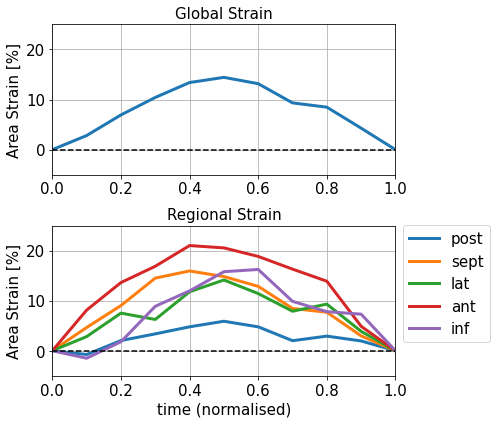

In [22]:
## Strain curve for Gordon slides

fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(7,6))

case_ind = 1

## Plot Global strain transient
y = list(nonaf_strains[0, case_ind, 0, :])
y.append(0)
ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3)

## Plot regional transients
for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i+1])
    
ax2.legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))
ax2.set_xlabel("time (normalised)", fontsize=15)

ax1.set_xlim(-0.0, 1.0)
ax2.set_xlim(-0.0, 1.0)
ax1.set_ylim(-5, 25)
ax2.set_ylim(-5, 25)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[i].set_ylabel("Area Strain [%]", fontsize=15)

ax1.grid()
ax2.grid()

ax1.set_title("Global Strain", fontsize=15)
ax2.set_title("Regional Strain", fontsize=15)

plt.tight_layout()


# plt.savefig("/home/csi20/Dropbox/phd/Documents/GOLDEN_slides/strain_curves_crt02_2.png", dpi=200, bbox_inches="tight")

## Normlaised Reservoir Strain

We've already seen that globally and regionally, AF cases have reduced strains.
However, when normalising with respect to average global strain, do AF cases have reduced regional strains?

In [23]:
non_af_ranges = nonaf_strains.ptp(axis=3)
af_ranges = af_strains.ptp(axis=3)

In [24]:
non_af_ranges[0, 0, :]/non_af_ranges[0, 0, 0] - 1

array([ 0.        , -0.640437  ,  0.18394088,  0.7688328 ,  0.48378242,
        0.39579132])

In [25]:
## N_strain_metric, N_case, N_regions
res_strain_norm_nonaf = np.zeros((3, len(nonaf_cases), 6))

for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[0, i, :]/non_af_ranges[0, i, 0] - 1    
    res_strain_norm_nonaf[0, i, :] = ans
    
for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[1, i, :]/non_af_ranges[1, i, 0] - 1    
    res_strain_norm_nonaf[1, i, :] = ans
    
for i in range(0, len(nonaf_cases)):
    ans = non_af_ranges[2, i, :]/non_af_ranges[2, i, 0] - 1    
    res_strain_norm_nonaf[2, i, :] = ans

In [26]:
res_strain_norm_af = np.zeros((3, len(af_cases), 6))

for i in range(0, len(af_cases)):
    ans = af_ranges[0, i, :]/af_ranges[0, i, 0] - 1
    res_strain_norm_af[0, i, :] = ans
    
for i in range(0, len(af_cases)):
    ans = af_ranges[1, i, :]/af_ranges[1, i, 0] - 1
    res_strain_norm_af[1, i, :] = ans
    
for i in range(0, len(af_cases)):
    ans = af_ranges[2, i, :]/af_ranges[2, i, 0] - 1
    res_strain_norm_af[2, i, :] = ans

In [27]:
res_strain_norm_nonaf.shape

(3, 17, 6)

<AxesSubplot:>

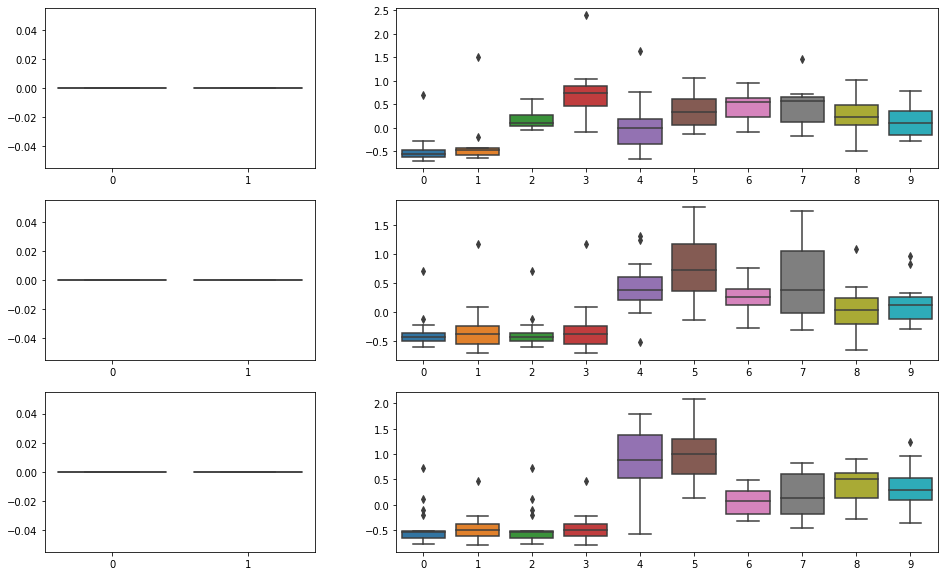

In [28]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16,10), gridspec_kw={'width_ratios': [1, 2]})

strain_metric_ind=0
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 0], res_strain_norm_af[strain_metric_ind, :, 0]], ax=ax1)
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 2], res_strain_norm_af[strain_metric_ind, :, 2],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]], ax=ax2)

strain_metric_ind=1
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 0], res_strain_norm_af[strain_metric_ind, :, 0]], ax=ax3)
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]], ax=ax4)

strain_metric_ind=2
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 0], res_strain_norm_af[strain_metric_ind, :, 0]], ax=ax5)
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]], ax=ax6)

AxesSubplot(0.125,0.657941;0.775x0.222059)


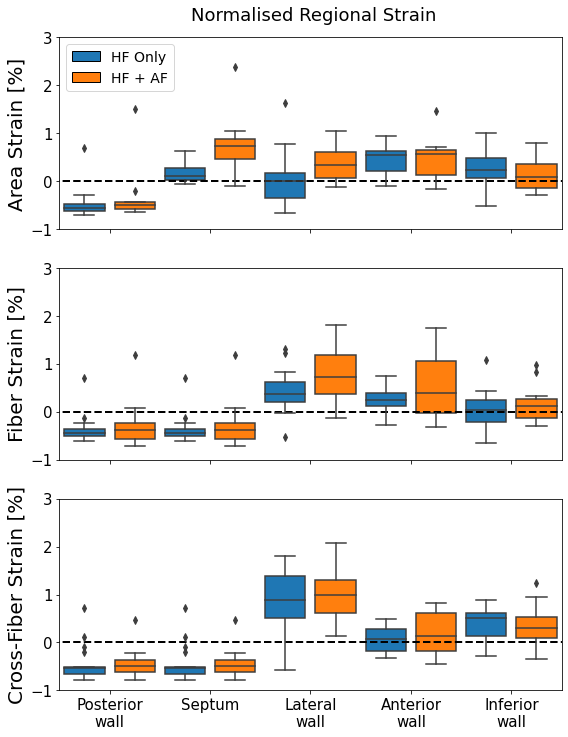

In [29]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(8,10), facecolor='white')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)

strain_metric_ind=0
data_to_plot = [res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 2], res_strain_norm_af[strain_metric_ind, :, 2],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]]
box1 = sns.boxplot(data=data_to_plot, ax=ax1)

strain_metric_ind=1
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax2)

strain_metric_ind=2
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax3)

print(fig.axes[0])

for j in range(0, len(fig.axes)):
    
    for i in range(0, 10, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:blue')

    for i in range(1, 11, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:orange')

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=20)
ax2.set_ylabel("Fiber Strain [%]", fontsize=20)
ax3.set_ylabel("Cross-Fiber Strain [%]", fontsize=20)

# print(box1.patches[0])
# plt.setp(box1["boxes"], facecolor=c2)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticks(np.arange(0.5, 10.5, 2))
    fig.axes[i].set_xticklabels(regions_axis[:])
    fig.axes[i].set_ylim(-1.0, 3.0)
    fig.axes[i].set_xlim(-0.5, 9.5)
#     fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)
    
# fig.text(0.5, 0.08, "Region", 
#          ha='center', fontsize=18)

fig.text(0.55, 1.0, "Normalised Regional Strain", 
         ha='center', fontsize=18)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

for i in [0, 1]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" ", " ", " ", " ", " "])

plt.tight_layout()
    
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/normalised_regional_strain_SAN.png", dpi=200, bbox_inches="tight")

AxesSubplot(0.125,0.657941;0.775x0.222059)


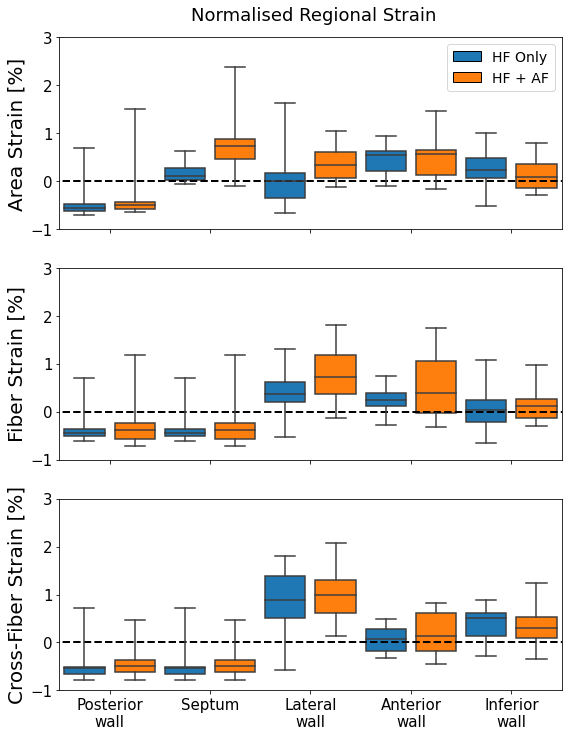

In [30]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3,1, figsize=(8,10), facecolor='white')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)

strain_metric_ind=0
data_to_plot = [res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 2], res_strain_norm_af[strain_metric_ind, :, 2],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]]
box1 = sns.boxplot(data=data_to_plot, ax=ax1, whis=(0, 100))

strain_metric_ind=1
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax2, whis=(0, 100))

strain_metric_ind=2
sns.boxplot(data=[res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 1], res_strain_norm_af[strain_metric_ind, :, 1],
                 res_strain_norm_nonaf[strain_metric_ind, :, 3], res_strain_norm_af[strain_metric_ind, :, 3],
                 res_strain_norm_nonaf[strain_metric_ind, :, 4], res_strain_norm_af[strain_metric_ind, :, 4],
                 res_strain_norm_nonaf[strain_metric_ind, :, 5], res_strain_norm_af[strain_metric_ind, :, 5]],
            ax=ax3, whis=(0, 100))

print(fig.axes[0])

for j in range(0, len(fig.axes)):
    
    for i in range(0, 10, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:blue')

    for i in range(1, 11, 2):
        mybox = fig.axes[j].patches[i]
        mybox.set_facecolor('tab:orange')

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=20)
ax2.set_ylabel("Fiber Strain [%]", fontsize=20)
ax3.set_ylabel("Cross-Fiber Strain [%]", fontsize=20)

# print(box1.patches[0])
# plt.setp(box1["boxes"], facecolor=c2)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].set_xticks(np.arange(0.5, 10.5, 2))
    fig.axes[i].set_xticklabels(regions_axis[:])
    fig.axes[i].set_ylim(-1.0, 3.0)
    fig.axes[i].set_xlim(-0.5, 9.5)
#     fig.axes[i].plot(np.arange(-2,11,1), [0.0]*13, ls='--', c='black', lw=2)
    
# fig.text(0.5, 0.08, "Region", 
#          ha='center', fontsize=18)

fig.text(0.55, 1.0, "Normalised Regional Strain", 
         ha='center', fontsize=18)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=14)

for i in [0, 1]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" ", " ", " ", " ", " "])

plt.tight_layout()
    
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/P1/normalised_regional_strain_SAN_2.png", dpi=200, bbox_inches="tight")

In [31]:
strain_metric_ind=2
regino_ind = 5
np.round(stats.ttest_ind(res_strain_norm_nonaf[strain_metric_ind, :, regino_ind], res_strain_norm_af[strain_metric_ind, :, regino_ind]), 30)

array([0.46082392, 0.6486154 ])

In [32]:
strain_metric_ind = 2
region_ind = 5

stats.ttest_ind(res_strain_norm_nonaf[strain_metric_ind, :, region_ind], 
                res_strain_norm_af[strain_metric_ind, :, region_ind])

Ttest_indResult(statistic=0.46082392445796655, pvalue=0.6486154010350138)

In [33]:
stats.ttest_ind(res_strain_norm_nonaf[1, :, 1], res_strain_norm_af[1, :, 1])

Ttest_indResult(statistic=-0.6577698292069566, pvalue=0.5162552856356297)

In [34]:
strain_metric_ind=0

for i in range(0, 6):
    p_val = stats.ttest_ind(res_strain_norm_nonaf[strain_metric_ind, :, i], res_strain_norm_af[strain_metric_ind, :, i])[-1]
    
    print(f"i: {regions[i]}: ", p_val)


i: global:  nan
i: roof:  0.40649876733269363
i: sept:  0.0014922432357122376
i: lat:  0.1244437013427723
i: ant:  0.914080529462202
i: post:  0.5236167748403808


Therefore, it looks like there is little difference btween AF and non-AF patients when looking at normalised regional strains. I.e. if we had patients with same given global strains, we wouldn't be able to find a discernible difference between AF and non-AF

# Fiber and Cross-Fiber Strains
## Testing deformation isotropy

In [35]:
af_ranges.shape

(3, 12, 6)

In [36]:
af_ranges[1, 0, :]

array([15.55731699, 11.19100614, 26.22654146, 25.00512665, 16.33773604,
       18.8479576 ])

Text(0.5, 0.06, 'Fiber Reservoir Strain [%]')

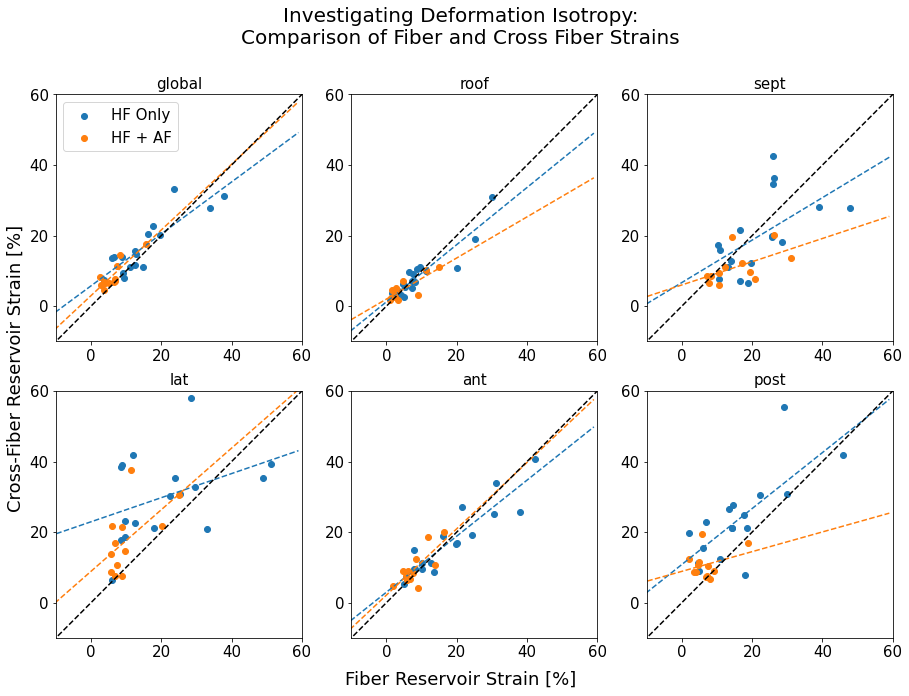

In [37]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

## AF vs nAF, Region, ax + b
coeffs=np.zeros((2,6,2))

for i in range(0, len(regions)):

    ## Scatter plot data points
    fig.axes[i].scatter(non_af_ranges[1, :, i], non_af_ranges[2, :, i], label="HF Only")
    fig.axes[i].scatter(af_ranges[1, :, i], af_ranges[2, :, i], label="HF + AF")
    
    ## Fit lines of best fit
    coeffs[0, i, 0], coeffs[0, i, 1] = np.polyfit(non_af_ranges[1, :, i], non_af_ranges[2, :, i], 1)
    coeffs[1, i, 0], coeffs[1, i, 1] = np.polyfit(af_ranges[1, :, i], af_ranges[2, :, i], 1)
    
    ## Plots lines of best fit
    x = np.arange(-12, 60)
    fig.axes[i].plot(x, coeffs[0, i, 0]*x + coeffs[0, i, 1], ls='--', c='tab:blue')
    fig.axes[i].plot(x, coeffs[1, i, 0]*x + coeffs[1, i, 1], ls='--', c='tab:orange')

    ## Plot y=x
    fig.axes[i].plot(np.arange(-11,70,10), np.arange(-11,70,10), ls='--', c='black')
    fig.axes[i].set_title(regions[i], fontsize=15)
    
    fig.axes[i].tick_params(axis='both', labelsize=15)
    
    fig.axes[i].set_ylim(-10, 60)
    fig.axes[i].set_xlim(-10, 60)

    fig.axes[i].set_yticks(np.arange(0, 70, 20))
    fig.axes[i].set_xticks(np.arange(0, 70, 20))
    
    
ax1.legend(fontsize=15)
    
fig.text(0.5, 0.95, f"Investigating Deformation Isotropy:\nComparison of Fiber and Cross Fiber Strains", 
             ha='center', fontsize=20)
fig.text(0.08, 0.5, "Cross-Fiber Reservoir Strain [%]",
             va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.06, "Fiber Reservoir Strain [%]", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/isotropy_1.png", dpi=200, bbox_inches="tight")

In [39]:
regions_v2

['global', 'post', 'sept', 'lat', 'ant', 'inf']

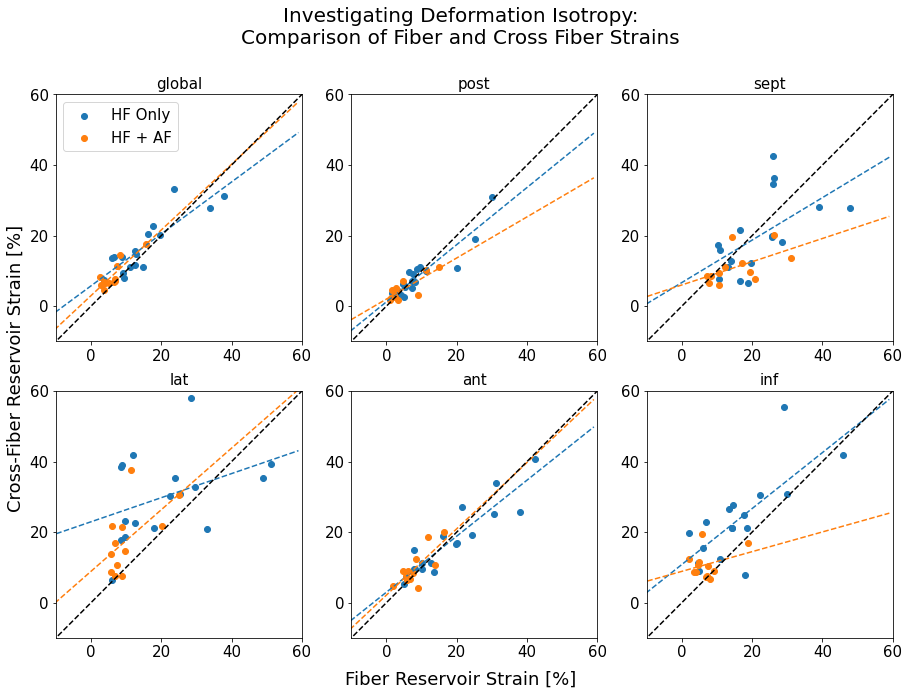

In [41]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

## AF vs nAF, Region, ax + b
coeffs=np.zeros((2,6,2))

for i in range(0, len(regions)):

    ## Scatter plot data points
    fig.axes[i].scatter(non_af_ranges[1, :, i], non_af_ranges[2, :, i], label="HF Only")
    fig.axes[i].scatter(af_ranges[1, :, i], af_ranges[2, :, i], label="HF + AF")
    
    ## Fit lines of best fit
    coeffs[0, i, 0], coeffs[0, i, 1] = np.polyfit(non_af_ranges[1, :, i], non_af_ranges[2, :, i], 1)
    coeffs[1, i, 0], coeffs[1, i, 1] = np.polyfit(af_ranges[1, :, i], af_ranges[2, :, i], 1)
    
    ## Plots lines of best fit
    x = np.arange(-12, 60)
    fig.axes[i].plot(x, coeffs[0, i, 0]*x + coeffs[0, i, 1], ls='--', c='tab:blue')
    fig.axes[i].plot(x, coeffs[1, i, 0]*x + coeffs[1, i, 1], ls='--', c='tab:orange')

    ## Plot y=x
    fig.axes[i].plot(np.arange(-11,70,10), np.arange(-11,70,10), ls='--', c='black')
    fig.axes[i].set_title(regions_v2[i], fontsize=15)
    
    fig.axes[i].tick_params(axis='both', labelsize=15)
    
    fig.axes[i].set_ylim(-10, 60)
    fig.axes[i].set_xlim(-10, 60)

    fig.axes[i].set_yticks(np.arange(0, 70, 20))
    fig.axes[i].set_xticks(np.arange(0, 70, 20))
    
    
ax1.legend(fontsize=15)
    
fig.text(0.5, 0.95, f"Investigating Deformation Isotropy:\nComparison of Fiber and Cross Fiber Strains", 
             ha='center', fontsize=20)
fig.text(0.08, 0.5, "Cross-Fiber Reservoir Strain [%]",
             va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.06, "Fiber Reservoir Strain [%]", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/isotropy_2.png", dpi=200, bbox_inches="tight", facecolor='white')

## Coefficient of Determination Analysis

In [34]:
## R2 anslysi

from sklearn.metrics import r2_score

for i in range(0, len(regions)):
    
    nonAF_R2 = r2_score(non_af_ranges[1, :, i], non_af_ranges[2, :, i])
    AF_R2 = r2_score(af_ranges[1, :, i], af_ranges[2, :, i])
    
    print(regions[i])
    print("nonAF R2:\t", nonAF_R2)
    print("AF R2:\t\t", AF_R2)

global
nonAF R2:	 0.713946813009895
AF R2:		 0.11896358286593112
roof
nonAF R2:	 0.8367774210996849
AF R2:		 0.6584471884955461
sept
nonAF R2:	 0.07101464739053076
AF R2:		 -0.05738558346982514
lat
nonAF R2:	 -0.5168888657549218
AF R2:		 -2.2800409081586865
ant
nonAF R2:	 0.8217125339132468
AF R2:		 0.1740076563698415
post
nonAF R2:	 -0.0576512362928816
AF R2:		 -1.1718334243864899


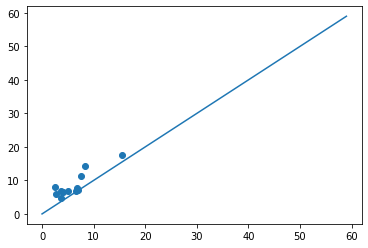

In [35]:
plt.scatter(af_ranges[1, :, 0], af_ranges[2, :, 0])
plt.plot(np.arange(0,60), np.arange(0,60))

# plt.xlim(0,20)
# plt.ylim(0,20)

In [36]:
non_af_ranges.shape

(3, 17, 6)

In [37]:
non_af_ranges[1, :, 0]

array([ 3.65757999,  9.09990394, 23.53989182, 17.74985977, 33.9217853 ,
        6.09458364,  6.65154909,  9.31294042, 14.7805203 , 12.83773888,
       19.56991758, 12.38282567, 16.17569054, 11.11781689,  8.84807029,
       12.3833412 , 37.7001088 ])

In [38]:
af_ranges[1, 0, 0]

15.557316987759881

## 30th MARCH: Normalising area strain vs normalised fiber strains

In [39]:
res_strain_norm_nonaf.shape

(3, 17, 6)

In [40]:
fig.axes[:]

[<AxesSubplot:title={'center':'global'}>,
 <AxesSubplot:title={'center':'roof'}>,
 <AxesSubplot:title={'center':'sept'}>,
 <AxesSubplot:title={'center':'lat'}>,
 <AxesSubplot:title={'center':'ant'}>,
 <AxesSubplot:title={'center':'post'}>]

In [41]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [87]:
res_strain_norm_nonaf[0, :, 1].shape

(17,)

In [92]:
res_strain_norm_af[0, :, 1]

array([-0.45722962, -0.42947197, -0.19747154, -0.55162469, -0.51268324,
       -0.63459534,  1.509342  , -0.43651102, -0.58962667, -0.43871091,
       -0.56941438, -0.61363864])

In [94]:
np.concatenate((res_strain_norm_nonaf[0, :, 1], res_strain_norm_af[0, :, 1]))

array([-0.640437  , -0.53995261, -0.62079307, -0.56363267, -0.2864901 ,
       -0.59128551, -0.70182946, -0.30561599,  0.6906543 , -0.50015629,
       -0.51463741, -0.45808443, -0.60393388, -0.47418278, -0.55923871,
       -0.70501188, -0.6154245 , -0.45722962, -0.42947197, -0.19747154,
       -0.55162469, -0.51268324, -0.63459534,  1.509342  , -0.43651102,
       -0.58962667, -0.43871091, -0.56941438, -0.61363864])

In [ ]:
res

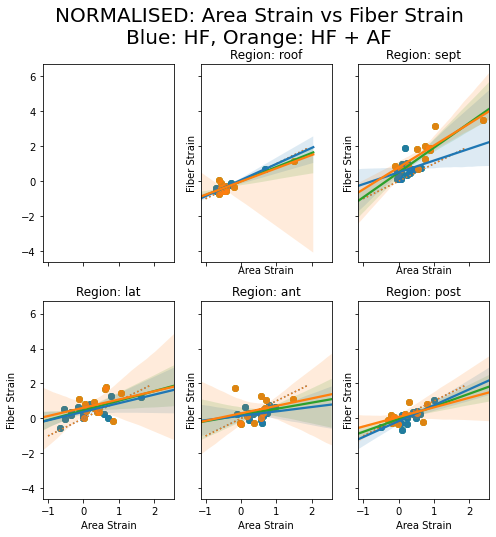

In [102]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

fig.suptitle("NORMALISED: Area Strain vs Fiber Strain\nBlue: HF, Orange: HF + AF", fontsize=20)

##nonAF
for i in range(1, len(fig.axes[:])):
    fig.axes[i].scatter(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[1, :, i])
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(res_strain_norm_af[0, :, i], res_strain_norm_af[1, :, i], c='orange')
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    
    ## Line of best fit
#     a,b = np.polyfit(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[1, :, i], 1)
#     x=np.arange(-1,2,0.1)
#     fig.axes[i].plot(x, a*x+b, c='tab:blue')

    ## Whole cohort
    res_strain_all_x = np.concatenate((res_strain_norm_nonaf[0, :, i], res_strain_norm_af[0, :, i]))
    res_strain_all_y = np.concatenate((res_strain_norm_nonaf[1, :, i], res_strain_norm_af[1, :, i]))
    
    sns.regplot(x=res_strain_all_x, y=res_strain_all_y,
                ci=95, ax=fig.axes[i], color='tab:green', truncate=False)

    ## nonAF cohort
    sns.regplot(x=res_strain_norm_nonaf[0, :, i], y=res_strain_norm_nonaf[1, :, i],
                ci=95, ax=fig.axes[i], color='tab:blue', truncate=False)
    ## AF cohort
    sns.regplot(x=res_strain_norm_af[0, :, i], y=res_strain_norm_af[1, :, i],
                ci=95, ax=fig.axes[i], color='tab:orange', truncate=False)

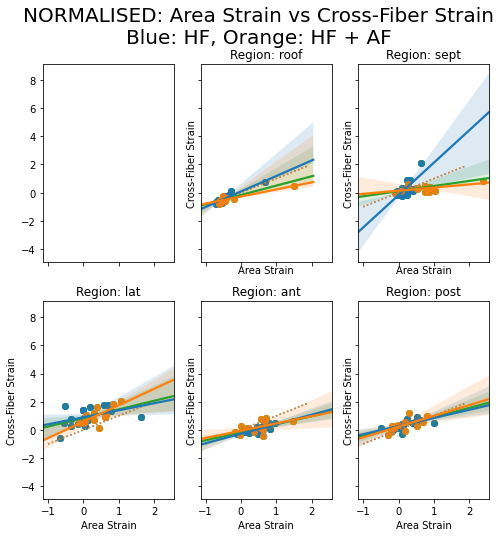

In [104]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

fig.suptitle("NORMALISED: Area Strain vs Cross-Fiber Strain\nBlue: HF, Orange: HF + AF", fontsize=20)

##nonAF
for i in range(1, len(fig.axes[:])):
    fig.axes[i].scatter(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[2, :, i])
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(res_strain_norm_af[0, :, i], res_strain_norm_af[2, :, i], c='orange')
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Area Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    
    ## Line of best fit
#     a,b = np.polyfit(res_strain_norm_nonaf[0, :, i], res_strain_norm_nonaf[2, :, i], 1)
#     x=np.arange(-1,2,0.1)
#     fig.axes[i].plot(x, a*x+b, c='tab:blue')

    ## Whole cohort
    res_strain_all_x = np.concatenate((res_strain_norm_nonaf[0, :, i], res_strain_norm_af[0, :, i]))
    res_strain_all_y = np.concatenate((res_strain_norm_nonaf[2, :, i], res_strain_norm_af[2, :, i]))
    
    sns.regplot(x=res_strain_all_x, y=res_strain_all_y,
                ci=95, ax=fig.axes[i], color='tab:green', truncate=False)

    ## nonAF cohort
    sns.regplot(x=res_strain_norm_nonaf[0, :, i], y=res_strain_norm_nonaf[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:blue', truncate=False)
    ## AF cohort
    sns.regplot(x=res_strain_norm_af[0, :, i], y=res_strain_norm_af[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:orange', truncate=False)

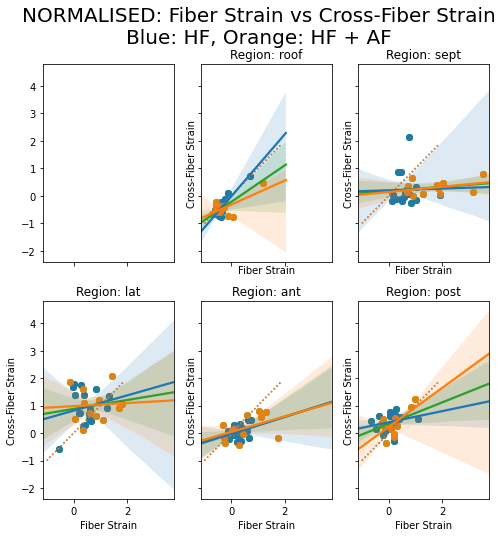

In [107]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True, sharex=True)

fig.suptitle("NORMALISED: Fiber Strain vs Cross-Fiber Strain\nBlue: HF, Orange: HF + AF", fontsize=20)

##nonAF
for i in range(1, len(fig.axes[:])):
    fig.axes[i].scatter(res_strain_norm_nonaf[1, :, i], res_strain_norm_nonaf[2, :, i])
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Fiber Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    fig.axes[i].scatter(res_strain_norm_af[1, :, i], res_strain_norm_af[2, :, i], c='orange')
    fig.axes[i].plot(np.arange(-1,2,0.1), np.arange(-1,2,0.1), ls='dotted')
    fig.axes[i].set_ylabel("Cross-Fiber Strain")
    fig.axes[i].set_xlabel("Fiber Strain")
    fig.axes[i].set_title(f"Region: {regions[i]}")
    
    
    ## Line of best fit
#     a,b = np.polyfit(res_strain_norm_nonaf[1, :, i], res_strain_norm_nonaf[2, :, i], 1)
#     x=np.arange(-1,2,0.1)
#     fig.axes[i].plot(x, a*x+b, c='tab:blue')

    ## Whole cohort
    res_strain_all_x = np.concatenate((res_strain_norm_nonaf[1, :, i], res_strain_norm_af[1, :, i]))
    res_strain_all_y = np.concatenate((res_strain_norm_nonaf[2, :, i], res_strain_norm_af[2, :, i]))
    
    sns.regplot(x=res_strain_all_x, y=res_strain_all_y,
                ci=95, ax=fig.axes[i], color='tab:green', truncate=False)

    ## nonAF cohort
    sns.regplot(x=res_strain_norm_nonaf[1, :, i], y=res_strain_norm_nonaf[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:blue', truncate=False)
    ## AF cohort
    sns.regplot(x=res_strain_norm_af[1, :, i], y=res_strain_norm_af[2, :, i],
                ci=95, ax=fig.axes[i], color='tab:orange', truncate=False)

Comments:
    
   * Roof: no difference between cohorts. f1 and f2 similar
   * Septum: Both cohorts 

# GOLDEN Slides for SAN

In [43]:
## Visualise case strain transients

case='CT-CRT/case08'

gt_gl_strain=np.zeros((6,10))
trk_gl_strain=np.zeros((6,10))

for i in range(0, len(regions)):
    region = regions[i]
    
    gt_gl_strain[i, :] = np.loadtxt(f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/area_meanstrains_{region}_excl_PVs.txt")
    trk_gl_strain[i, :] = np.loadtxt(f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/veri/area_meanstrains_{region}_excl_PVs.txt")

In [44]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post']

NameError: name 'regions_incl_global' is not defined

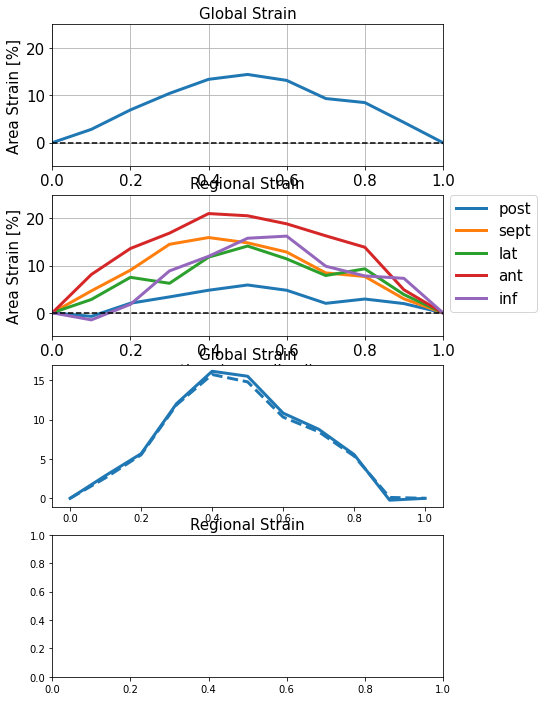

In [45]:
## GORDON conf slides

fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4,1, figsize=(7,12))

case_ind = 1

y = list(nonaf_strains[0, case_ind, 0, :])
y.append(0)
ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3)

for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i+1])
    
ax2.legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))
ax2.set_xlabel("time (normalised)", fontsize=15)

ax1.set_xlim(-0.0, 1.0)
ax2.set_xlim(-0.0, 1.0)
ax1.set_ylim(-5, 25)
ax2.set_ylim(-5, 25)

for i in range(0, 2):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[i].set_ylabel("Area Strain [%]", fontsize=15)

ax1.grid()
ax2.grid()

ax1.set_title("Global Strain", fontsize=15)
ax2.set_title("Regional Strain", fontsize=15)

### PLot last 2 rows

## Plot global
y_gt = list(gt_gl_strain[0, :])
y_gt.append(0)
y_trk = list(trk_gl_strain[0, :])
y_trk.append(0)

ax3.plot(np.arange(0, 1.1, 0.1), y_gt, lw=3, label="True")
ax3.plot(np.arange(0, 1.1, 0.1), y_trk, lw=3, ls='--', label="Measured", c='tab:blue')

ax3.set_title("Global Strain", fontsize=15)
ax4.set_title("Regional Strain", fontsize=15)

## Plot regional
colors_list=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for i in range(1, len(regions_incl_global)):
    region = regions_incl_global[i]
    
    y_gt = list(gt_gl_strain[i, :])
    y_gt.append(0)
    ax4.plot(np.arange(0, 1.1, .1), y_gt, lw=3, label="GT")
    
    y_trk = list(trk_gl_strain[i, :])
    y_trk.append(0)
    ax4.plot(np.arange(0, 1.1, .1), y_trk, lw=3, ls='--', label=regions_incl_global[i], c=colors_list[i-1])

for j in range(2, 4):
    fig.axes[j].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[j].tick_params(labelsize=15)
    fig.axes[j].grid()
    fig.axes[j].set_ylabel("Area Strain [%]", fontsize=15)
    fig.axes[j].set_xlim(-0.0, 1.0)
    
ax3.set_ylim(-5, 30)
ax4.set_ylim(-5, 30)
    
ax3.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))

    
plt.tight_layout()


# plt.savefig("/home/csi20/Dropbox/phd/Documents/GOLDEN_slides/strain_curves_crt02_veri_comb.png", dpi=200, bbox_inches="tight")